In [1]:
!pip install seaborn
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

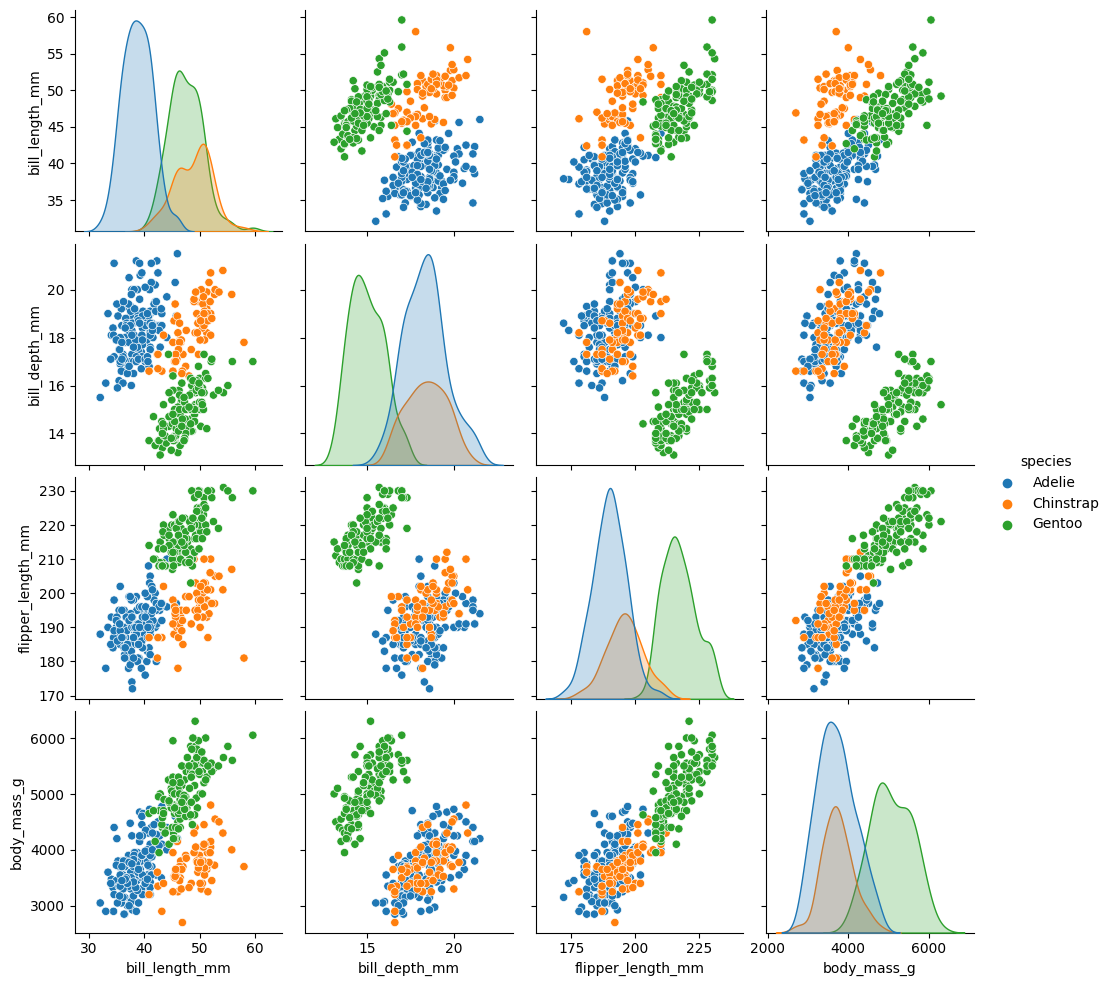

In [2]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')

# Display the first few rows of the DataFrame
print("First few data samples:")
print(df.head())

First few data samples:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Conditi

In [4]:
# Number of data samples and features
print("Number of data samples:", df.shape[0])
print("Number of features:", df.shape[1])

Number of data samples: 2930
Number of features: 82


In [5]:
for column in df.columns:
    print(column)
    if df[column].dtype == 'object' or df[column].nunique() < 20:  # Check for categorical data or columns with few unique values
        print(f"Column: {column}")
        print("Number of classes:", df[column].nunique())
        print("Number of data samples per class:")
        print(df[column].value_counts())
        print()  # Add a newline for better readability between outputs

Order
PID
MS SubClass
Column: MS SubClass
Number of classes: 16
Number of data samples per class:
MS SubClass
20     1079
60      575
50      287
120     192
30      139
160     129
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

MS Zoning
Column: MS Zoning
Number of classes: 7
Number of data samples per class:
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

Lot Frontage
Lot Area
Street
Column: Street
Number of classes: 2
Number of data samples per class:
Street
Pave    2918
Grvl      12
Name: count, dtype: int64

Alley
Column: Alley
Number of classes: 2
Number of data samples per class:
Alley
Grvl    120
Pave     78
Name: count, dtype: int64

Lot Shape
Column: Lot Shape
Number of classes: 4
Number of data samples per class:
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: c

In [6]:
dropped_columns = []  # List to store the names of dropped columns

# Iteratively check each column for the percentage of null values and drop if necessary
for column in df.columns:
    null_count = df[column].isna().sum()
    perc = (null_count / df.shape[0]) * 100
    print(f"Number of null values in {column}: {null_count}, which is {perc}% of the total")

    # If more than 50% of the data in the column is NA, drop the column
    if perc > 50:
        df.drop(column, axis=1, inplace=True)
        dropped_columns.append(column)  # Add the dropped column name to the list
        print(f"{column} dropped because {perc}% of its data is NA.")

# Display the columns remaining after potential drops
print("Remaining columns after dropping those with more than 50% NA values:")
print(df.columns)

# Display the columns that were dropped
if dropped_columns:
    print("Columns dropped due to more than 50% NA values:")
    print(dropped_columns)
else:
    print("No columns were dropped.")

Number of null values in Order: 0, which is 0.0% of the total
Number of null values in PID: 0, which is 0.0% of the total
Number of null values in MS SubClass: 0, which is 0.0% of the total
Number of null values in MS Zoning: 0, which is 0.0% of the total
Number of null values in Lot Frontage: 490, which is 16.723549488054605% of the total
Number of null values in Lot Area: 0, which is 0.0% of the total
Number of null values in Street: 0, which is 0.0% of the total
Number of null values in Alley: 2732, which is 93.24232081911262% of the total
Alley dropped because 93.24232081911262% of its data is NA.
Number of null values in Lot Shape: 0, which is 0.0% of the total
Number of null values in Land Contour: 0, which is 0.0% of the total
Number of null values in Utilities: 0, which is 0.0% of the total
Number of null values in Lot Config: 0, which is 0.0% of the total
Number of null values in Land Slope: 0, which is 0.0% of the total
Number of null values in Neighborhood: 0, which is 0.0% 

In [7]:
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2       IR1          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...              0          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0            0         0        0       5 

In [8]:
for column in df.columns:
    null_count = df[column].isna().sum()
    if null_count > 0:  # Check if there are any null values in the column
        print(f"Column: {column}")
        print(f"Data Type: {df[column].dtype}")  # Print the data type of the column
        print(f"Number of NA values: {null_count}")  # Print the number of NA values
        print()  # Adds an empty line for better readability

Column: Lot Frontage
Data Type: float64
Number of NA values: 490

Column: Mas Vnr Area
Data Type: float64
Number of NA values: 23

Column: Bsmt Qual
Data Type: object
Number of NA values: 80

Column: Bsmt Cond
Data Type: object
Number of NA values: 80

Column: Bsmt Exposure
Data Type: object
Number of NA values: 83

Column: BsmtFin Type 1
Data Type: object
Number of NA values: 80

Column: BsmtFin SF 1
Data Type: float64
Number of NA values: 1

Column: BsmtFin Type 2
Data Type: object
Number of NA values: 81

Column: BsmtFin SF 2
Data Type: float64
Number of NA values: 1

Column: Bsmt Unf SF
Data Type: float64
Number of NA values: 1

Column: Total Bsmt SF
Data Type: float64
Number of NA values: 1

Column: Electrical
Data Type: object
Number of NA values: 1

Column: Bsmt Full Bath
Data Type: float64
Number of NA values: 2

Column: Bsmt Half Bath
Data Type: float64
Number of NA values: 2

Column: Fireplace Qu
Data Type: object
Number of NA values: 1422

Column: Garage Type
Data Type: obje

In [9]:
for column in df.columns:
    if df[column].isna().sum() > 0:  # Check if the column contains at least one NA value
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
            skew_value = df[column].skew()  # Calculate skewness
            print(f"Skewness of {column} (contains NAs): {skew_value}")


Skewness of Lot Frontage (contains NAs): 1.499067354883421
Skewness of Mas Vnr Area (contains NAs): 2.606984784742485
Skewness of BsmtFin SF 1 (contains NAs): 1.416182206786989
Skewness of BsmtFin SF 2 (contains NAs): 4.139978473979118
Skewness of Bsmt Unf SF (contains NAs): 0.9230527428629574
Skewness of Total Bsmt SF (contains NAs): 1.156204321548864
Skewness of Bsmt Full Bath (contains NAs): 0.6166390019959825
Skewness of Bsmt Half Bath (contains NAs): 3.940795464335767
Skewness of Garage Yr Blt (contains NAs): -0.38467176161174854
Skewness of Garage Cars (contains NAs): -0.2198363641384971
Skewness of Garage Area (contains NAs): 0.2419942395445727


In [10]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]) and df[column].isna().sum() > 0:
        skew_value = df[column].skew()
        print(f"Skewness of {column}: {skew_value}")

        # If data is skewed, use median, otherwise use mean
        if abs(skew_value) > 0.5:  # Adjust the threshold if needed
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
            print(f"Filled NA in {column} with median: {median_value}")
        else:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Filled NA in {column} with mean: {mean_value}")

print("Missing value replacement complete.")

Skewness of Lot Frontage: 1.499067354883421
Filled NA in Lot Frontage with median: 68.0
Skewness of Mas Vnr Area: 2.606984784742485
Filled NA in Mas Vnr Area with median: 0.0
Skewness of BsmtFin SF 1: 1.416182206786989
Filled NA in BsmtFin SF 1 with median: 370.0
Skewness of BsmtFin SF 2: 4.139978473979118
Filled NA in BsmtFin SF 2 with median: 0.0
Skewness of Bsmt Unf SF: 0.9230527428629574
Filled NA in Bsmt Unf SF with median: 466.0
Skewness of Total Bsmt SF: 1.156204321548864
Filled NA in Total Bsmt SF with median: 990.0
Skewness of Bsmt Full Bath: 0.6166390019959825
Filled NA in Bsmt Full Bath with median: 0.0
Skewness of Bsmt Half Bath: 3.940795464335767
Filled NA in Bsmt Half Bath with median: 0.0
Skewness of Garage Yr Blt: -0.38467176161174854
Filled NA in Garage Yr Blt with mean: 1978.1324431613136
Skewness of Garage Cars: -0.2198363641384971
Filled NA in Garage Cars with mean: 1.7668146124957322
Skewness of Garage Area: 0.2419942395445727
Filled NA in Garage Area with mean: 47

/tmp/ipykernel_18/3812675849.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
/tmp/ipykernel_18/3812675849.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [11]:
print(df.head)

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL          68.0      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Lot 

In [12]:
print("Columns with non-numeric data and sample unique values:")
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        unique_values = df[column].unique()[:]  
        print(f"{column} ({df[column].dtype}):")
        print("Sample unique values:", unique_values)
        print()
print(df.head)

Columns with non-numeric data and sample unique values:
MS Zoning (object):
Sample unique values: ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']

Street (object):
Sample unique values: ['Pave' 'Grvl']

Lot Shape (object):
Sample unique values: ['IR1' 'Reg' 'IR2' 'IR3']

Land Contour (object):
Sample unique values: ['Lvl' 'HLS' 'Bnk' 'Low']

Utilities (object):
Sample unique values: ['AllPub' 'NoSewr' 'NoSeWa']

Lot Config (object):
Sample unique values: ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']

Land Slope (object):
Sample unique values: ['Gtl' 'Mod' 'Sev']

Neighborhood (object):
Sample unique values: ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']

Condition 1 (object):
Sample unique values: ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn

In [13]:
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        unique_values = df[column].unique()
        # Apply binary encoding if there are exactly two unique values
        if len(unique_values) == 2:
            df[column] = df[column].map({unique_values[0]: 0, unique_values[1]: 1})
            print(f"{column} has been binary encoded.")

# Check the structure and first few rows of the DataFrame after encoding
print(df.info())
print(df.head())

Street has been binary encoded.
Central Air has been binary encoded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   int64  
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   obje

In [14]:
print(df.head)

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  \
0         1  526301100           20        RL         141.0     31770       0   
1         2  526350040           20        RH          80.0     11622       0   
2         3  526351010           20        RL          81.0     14267       0   
3         4  526353030           20        RL          93.0     11160       0   
4         5  527105010           60        RL          74.0     13830       0   
...     ...        ...          ...       ...           ...       ...     ...   
2925   2926  923275080           80        RL          37.0      7937       0   
2926   2927  923276100           20        RL          68.0      8885       0   
2927   2928  923400125           85        RL          62.0     10441       0   
2928   2929  924100070           20        RL          77.0     10010       0   
2929   2930  924151050           60        RL          74.0      9627       0  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


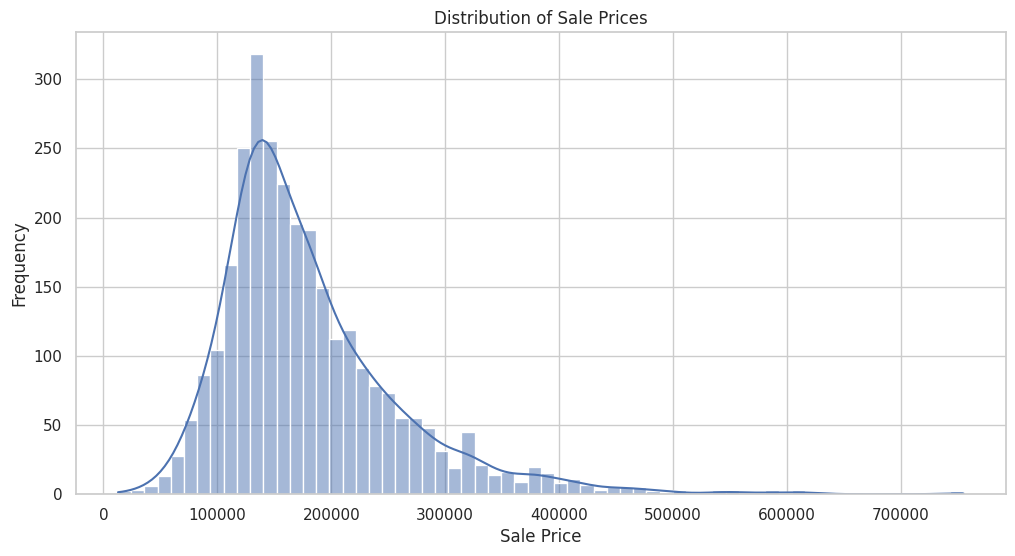

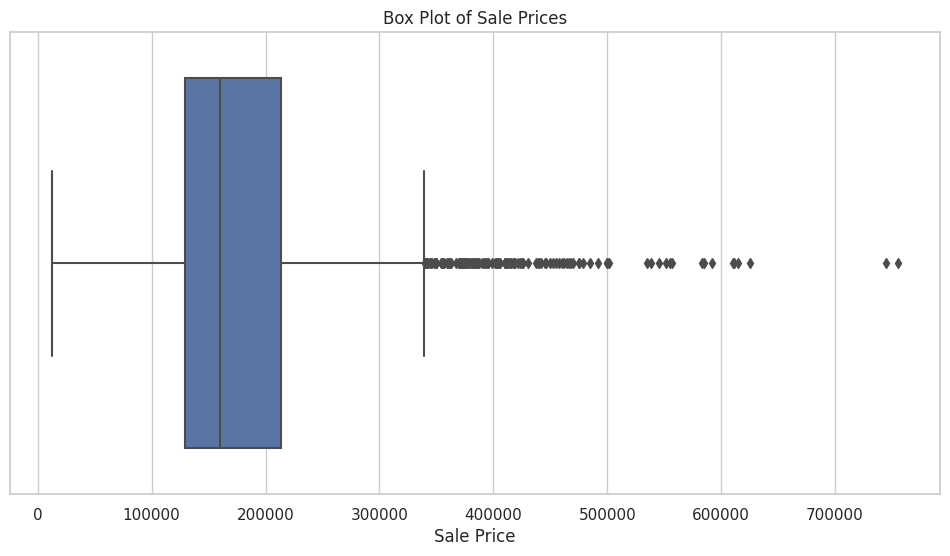

In [15]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of Sale Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Sale Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='SalePrice', data=df)
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

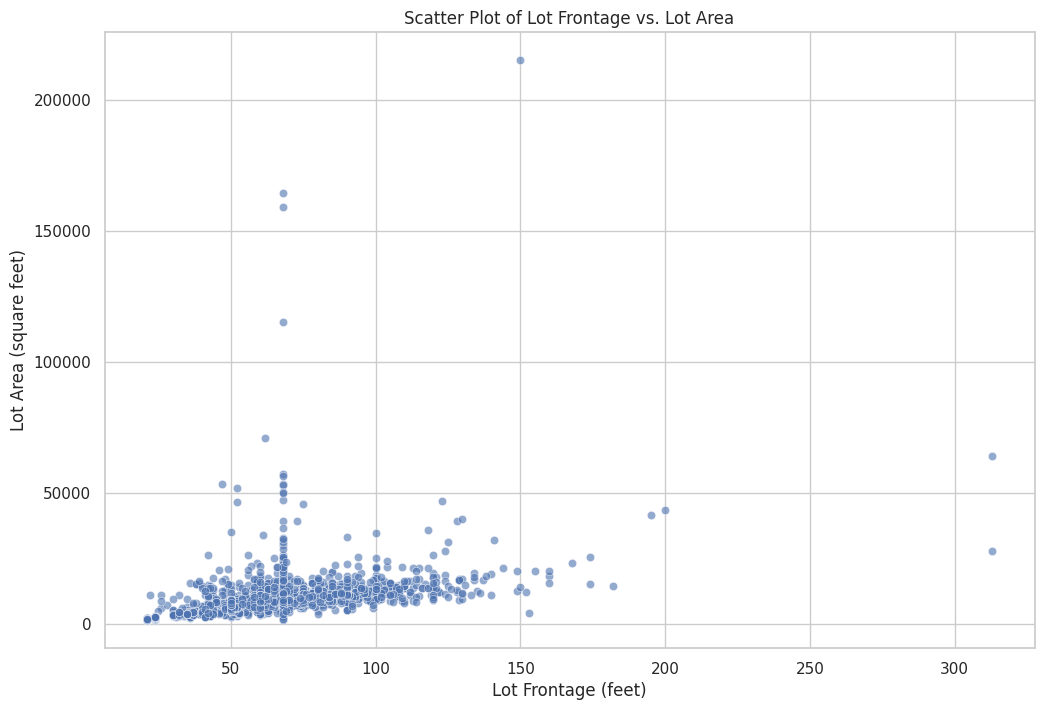

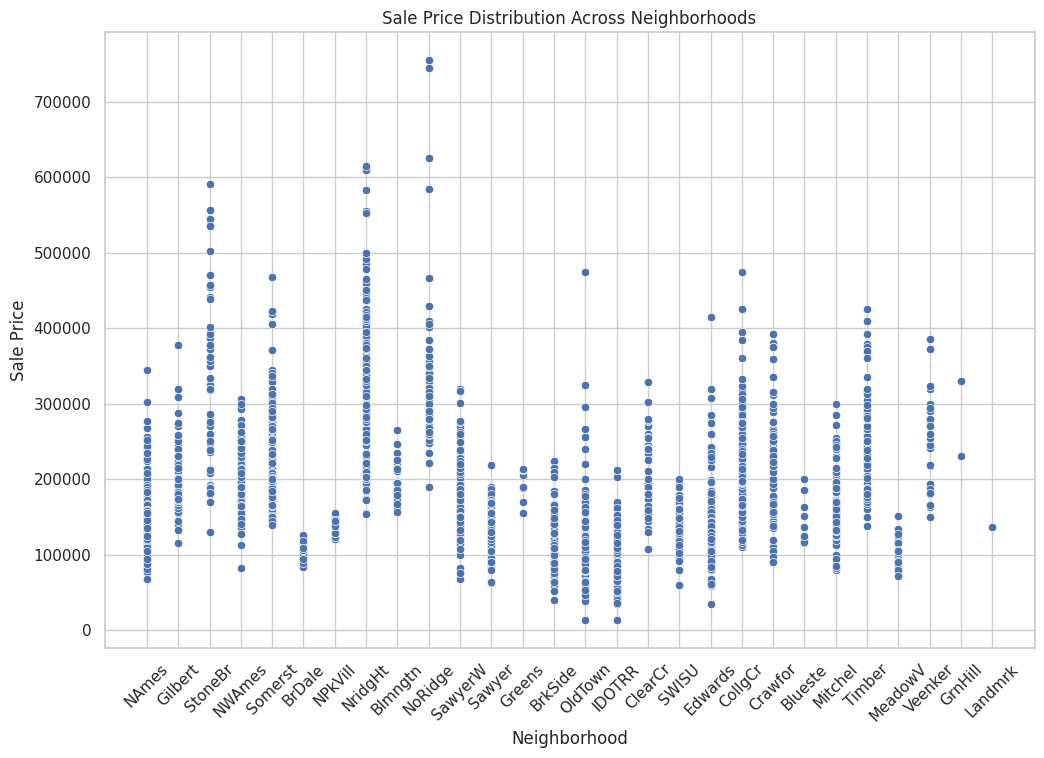

In [16]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter Plot of Lot Frontage vs Lot Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Lot Frontage', y='Lot Area', data=df, alpha=0.6)
plt.title('Scatter Plot of Lot Frontage vs. Lot Area')
plt.xlabel('Lot Frontage (feet)')
plt.ylabel('Lot Area (square feet)')
plt.show()

# If you have neighborhood data and want to visualize Sale Price in different neighborhoods
# This assumes 'Neighborhood' is a column in your dataframe
if 'Neighborhood' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Neighborhood', y='SalePrice', data=df)
    plt.title('Sale Price Distribution Across Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.show()
else:
    print("Neighborhood data not available for plotting.")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


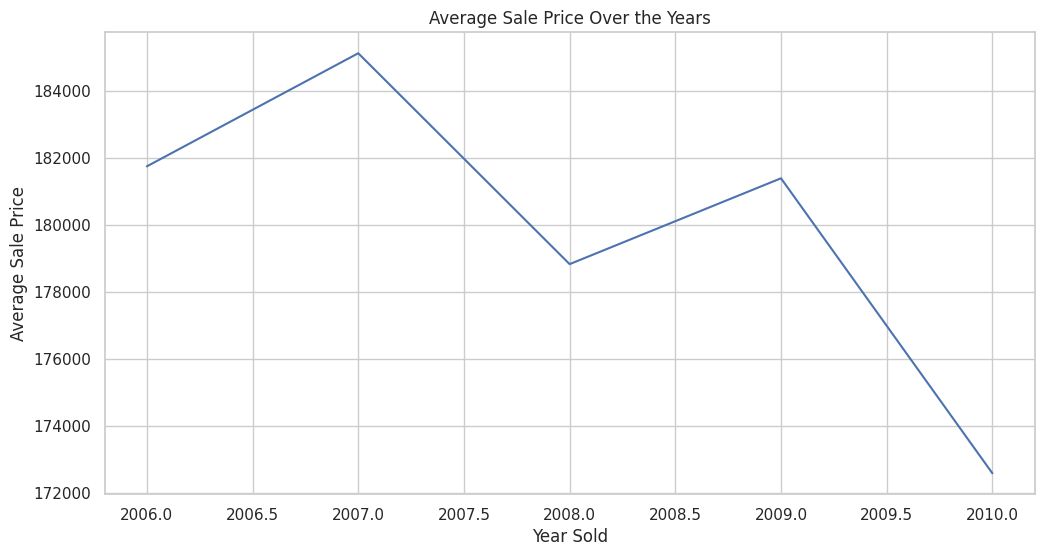

In [17]:
sns.set(style="whitegrid")

# Group by 'Yr Sold' and calculate the average 'SalePrice'
yearly_avg = df.groupby('Yr Sold')['SalePrice'].mean()

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title('Average Sale Price Over the Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()

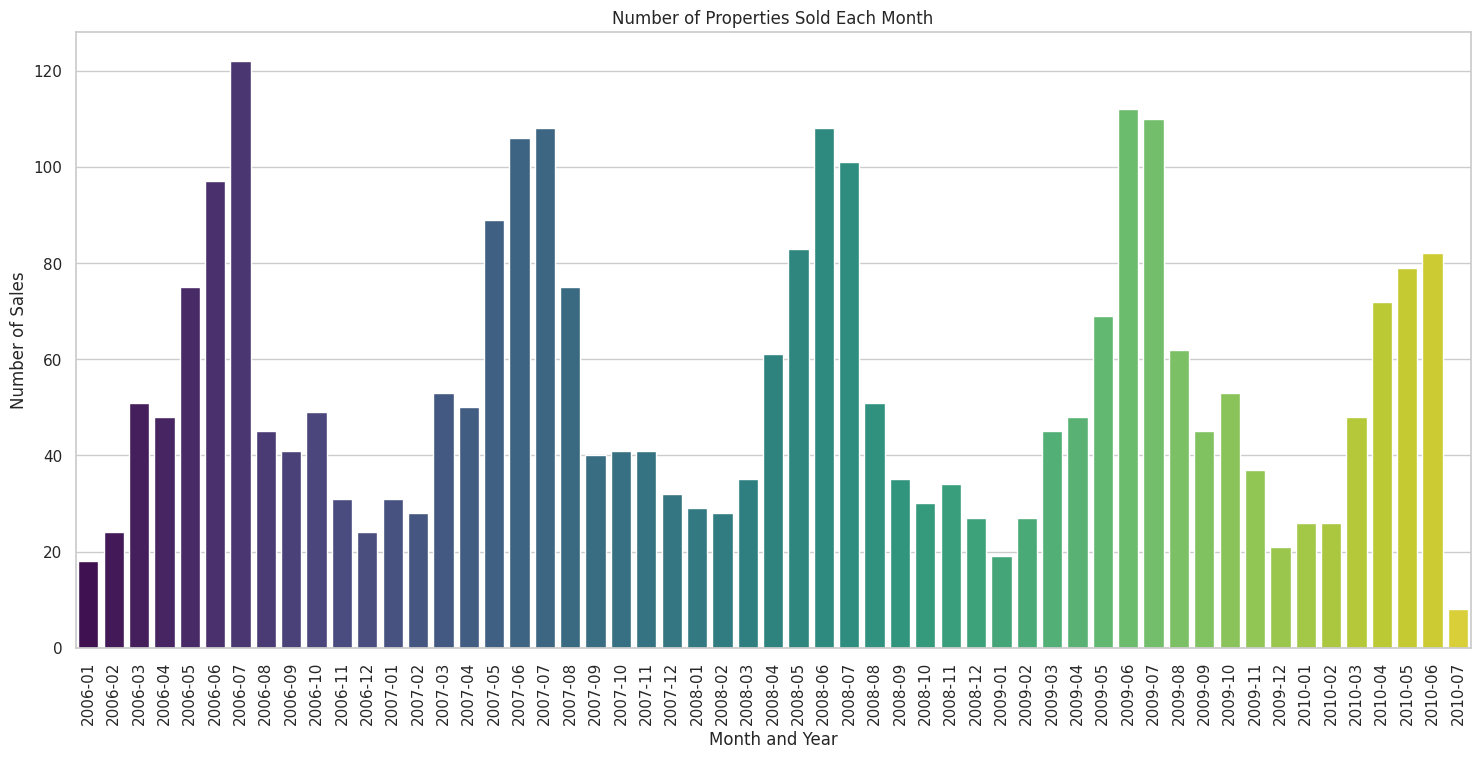

In [18]:
# Create a new column combining year and month for detailed trend analysis
df['Year_Month'] = df['Yr Sold'].astype(str) + '-' + df['Mo Sold'].astype(str).str.zfill(2)

# Count the number of sales per 'Year_Month'
monthly_sales = df['Year_Month'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(18, 8))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.title('Number of Properties Sold Each Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)  # Rotate the labels for better visibility
plt.show()


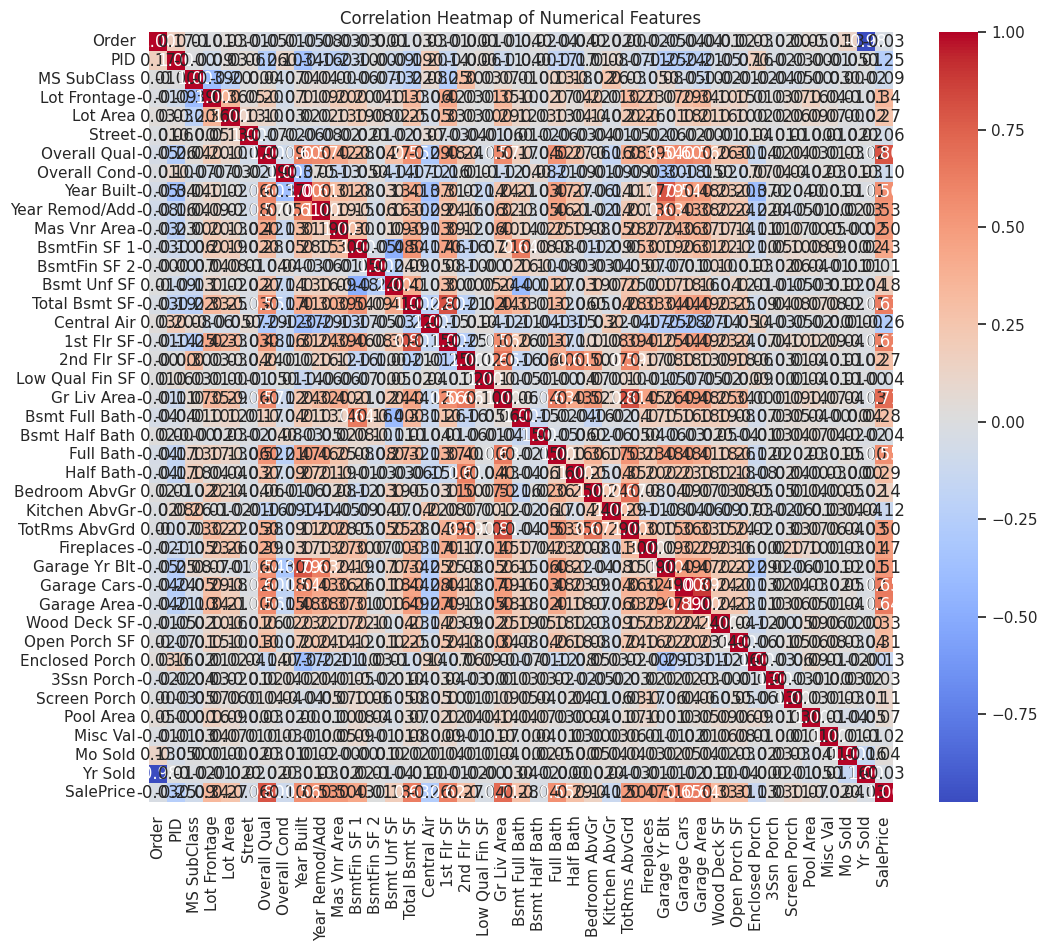

In [19]:
# Calculate the correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

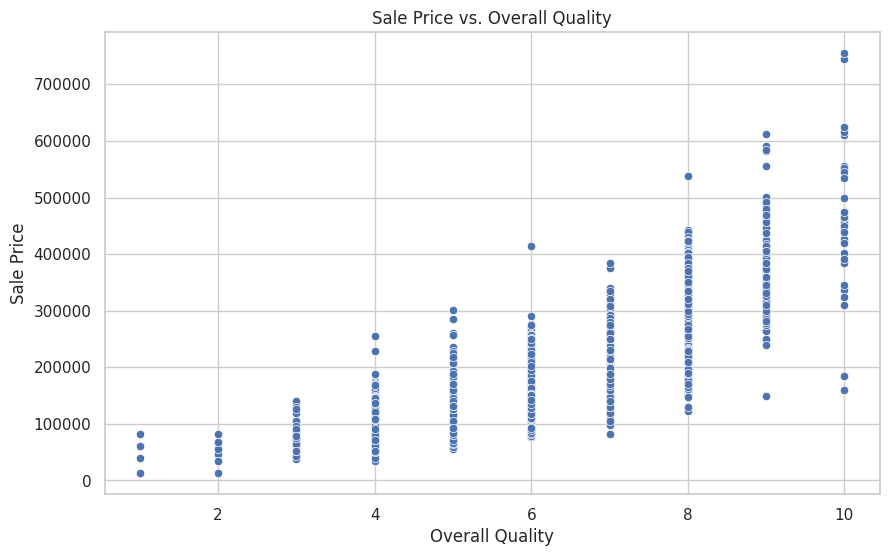

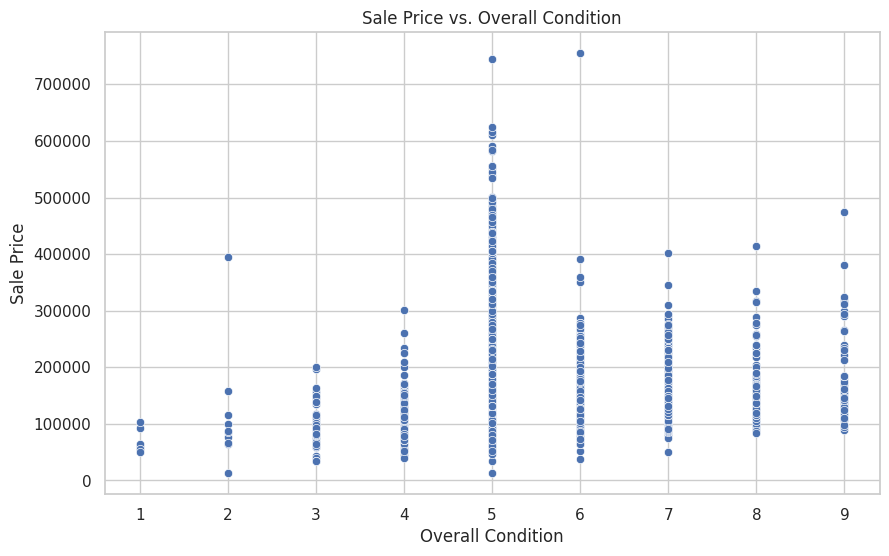

In [20]:
# Scatter plot for 'Overall Qual' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)
plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Scatter plot for 'Overall Cond' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Cond', y='SalePrice', data=df)
plt.title('Sale Price vs. Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()
